In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('data/GOOG.csv')

In [3]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,204.246567,207.142731,200.247589,204.529724,204.529724,12550600
1,2008-10-02,203.570969,203.665359,191.752838,193.983322,193.983322,12047500
2,2008-10-03,197.391159,204.917206,190.297302,192.204895,192.204895,16089700
3,2008-10-06,185.781662,186.780182,177.426010,184.405624,184.405624,22587000
4,2008-10-07,185.458771,186.278442,171.569107,171.887039,171.887039,22252500
5,2008-10-08,164.013245,178.335098,162.001343,167.962570,167.962570,23806600
6,2008-10-09,171.146851,173.158768,159.795685,163.427063,163.427063,16254900
7,2008-10-10,155.568176,169.840347,154.147415,164.927307,164.927307,21333300
8,2008-10-13,176.745438,189.740921,171.757874,189.278915,189.278915,17926800
9,2008-10-14,195.493500,195.975372,177.346527,180.183090,180.183090,15670700


In [4]:
training_set = dataset_train.iloc[:,1:-1]#.values

In [5]:
training_set

,Open,High,Low,Close,Adj Close
0,204.246567,207.142731,200.247589,204.529724,204.529724
1,203.570969,203.665359,191.752838,193.983322,193.983322
2,197.391159,204.917206,190.297302,192.204895,192.204895
3,185.781662,186.780182,177.426010,184.405624,184.405624
4,185.458771,186.278442,171.569107,171.887039,171.887039
5,164.013245,178.335098,162.001343,167.962570,167.962570
6,171.146851,173.158768,159.795685,163.427063,163.427063
7,155.568176,169.840347,154.147415,164.927307,164.927307
8,176.745438,189.740921,171.757874,189.278915,189.278915
9,195.493500,195.975372,177.346527,180.183090,180.183090


In [6]:
training_set = dataset_train.iloc[:,5:6].values

In [7]:
training_set

array([[ 204.529724],
       [ 193.983322],
       [ 192.204895],
       ...,
       [1231.150024],
       [1249.300049],
       [1239.119995]])

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler


In [9]:
sc = MinMaxScaler(feature_range = (0, 1))



In [10]:
training_set_scaled = sc.fit_transform(training_set)

In [11]:
training_set_scaled

array([[0.06720335],
       [0.05795571],
       [0.05639629],
       ...,
       [0.96739866],
       [0.98331356],
       [0.97438715]])

In [12]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(120, 2497):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train


array([[0.06720335, 0.05795571, 0.05639629, ..., 0.03167635, 0.0397087 ,
        0.0390858 ],
       [0.05795571, 0.05639629, 0.04955747, ..., 0.0397087 , 0.0390858 ,
        0.03773546],
       [0.05639629, 0.04955747, 0.03858051, ..., 0.0390858 , 0.03773546,
        0.04175164],
       ...,
       [0.87519752, 0.90504564, 0.90895637, ..., 0.94480213, 0.9581917 ,
        0.97675461],
       [0.90504564, 0.90895637, 0.88586886, ..., 0.9581917 , 0.97675461,
        0.96739866],
       [0.90895637, 0.88586886, 0.89579479, ..., 0.97675461, 0.96739866,
        0.98331356]])

In [14]:
y_train

array([0.03773546, 0.04175164, 0.03931666, ..., 0.96739866, 0.98331356,
       0.97438715])

In [15]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [17]:
# Initialising the RNN
regressor = Sequential()

In [18]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [19]:
# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
# Adding the third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
# Adding the fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [22]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [23]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2377/2377 [==============================] - 60s - loss: 0.0189    
Epoch 2/100
2377/2377 [==============================] - 55s - loss: 0.0026    
Epoch 3/100
2377/2377 [==============================] - 55s - loss: 0.0021    
Epoch 4/100
2377/2377 [==============================] - 56s - loss: 0.0022    
Epoch 5/100
2377/2377 [==============================] - 55s - loss: 0.0022    
Epoch 6/100
2377/2377 [==============================] - 57s - loss: 0.0018    
Epoch 7/100
2377/2377 [==============================] - 55s - loss: 0.0018    
Epoch 8/100
2377/2377 [==============================] - 55s - loss: 0.0018    
Epoch 9/100
2377/2377 [==============================] - 55s - loss: 0.0021    
Epoch 10/100
2377/2377 [==============================] - 56s - loss: 0.0015    
Epoch 11/100
2377/2377 [==============================] - 55s - loss: 0.0016    
Epoch 12/100
2377/2377 [==============================] - 55s - loss: 0.0015    
Epoch 13/100
2377/2377 [=============

In [25]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('data/GOOG_test.csv')


In [26]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,1204.270020,1212.989990,1192.500000,1197.000000,1197.000000,1831000
1,2018-09-05,1193.800049,1199.010010,1162.000000,1186.479980,1186.479980,2061300
2,2018-09-06,1186.300049,1186.300049,1152.000000,1171.439941,1171.439941,1888500
3,2018-09-07,1158.670044,1175.260010,1157.214966,1164.829956,1164.829956,1401300
4,2018-09-10,1172.189941,1174.540039,1160.109985,1164.640015,1164.640015,1115400
5,2018-09-11,1161.630005,1178.680054,1156.239990,1177.359985,1177.359985,1209300
6,2018-09-12,1172.719971,1178.609985,1158.359985,1162.819946,1162.819946,1295500
7,2018-09-13,1170.739990,1178.609985,1162.849976,1175.329956,1175.329956,1431200
8,2018-09-14,1179.099976,1180.425049,1168.329956,1172.530029,1172.530029,944000
9,2018-09-17,1170.140015,1177.239990,1154.030029,1156.050049,1156.050049,1306500


In [27]:
real_stock_price = dataset_test.iloc[:, 5:6].values

In [28]:
real_stock_price

array([[1197.      ],
       [1186.47998 ],
       [1171.439941],
       [1164.829956],
       [1164.640015],
       [1177.359985],
       [1162.819946],
       [1175.329956],
       [1172.530029],
       [1156.050049],
       [1161.219971],
       [1171.089966],
       [1186.869995],
       [1166.089966],
       [1173.369995],
       [1184.650024],
       [1180.48999 ],
       [1194.640015],
       [1193.469971]])

In [29]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Adj Close'], dataset_test['Adj Close']), axis = 0)

In [30]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) -120:].values

In [31]:
inputs = inputs.reshape(-1,1)

In [32]:
inputs = sc.transform(inputs)

In [33]:
X_test = []
for i in range(120, 139):
    X_test.append(inputs[i-120:i, 0])

In [34]:
X_test = np.array(X_test)

In [35]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [36]:
predicted_stock_price = regressor.predict(X_test)

In [37]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

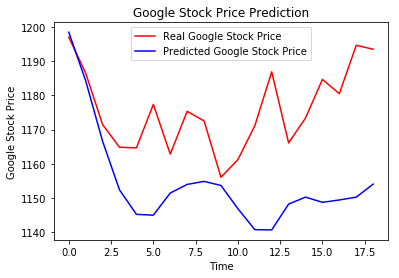

In [38]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [39]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [40]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price, predicted_stock_price)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))))

Score
MAE:  21.4898
RMSE: 25.5574  


In [41]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price, predicted_stock_price)))

MSE:  653.1806
